# 1. Linear Regression (LR)

In [959]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data extraction & EDA

In [960]:
df=pd.read_csv('NVDA.csv')

In [961]:
df1=df.reset_index()

In [962]:
df1.sort_values('index',inplace=True,ascending=False)

In [963]:
df1['Close/Last']=df1['Close/Last'].apply(lambda x:x.split('$')[1])

In [964]:
df1['Close/Last']=df1['Close/Last'].astype(float)

In [965]:
dates=np.array(df1['Date'])

In [966]:
dates

array(['2/21/2017', '2/22/2017', '2/23/2017', ..., '2/16/2022',
       '2/17/2022', '2/18/2022'], dtype=object)

In [967]:
df2=df1.reset_index()['Close/Last']

In [968]:
df2.shape

(1260,)

Text(0.5, 1.0, 'NVDA Price 5 year data')

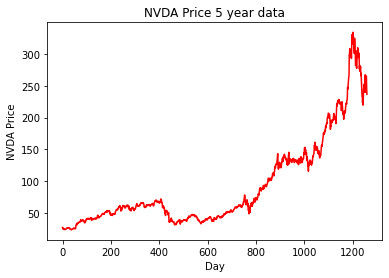

In [969]:
plt.plot(df2,color = 'red')
plt.xlabel('Day')
plt.ylabel('NVDA Price')
plt.title('NVDA Price 5 year data')

In [970]:
df2=np.array(df2).reshape(-1,1)

## Converting time series data for regression with time steps

In [1044]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
 

In [972]:
X,y=split_sequence(df2,10)

In [973]:
X.shape

(1250, 10, 1)

In [974]:
X=X.reshape(1250,-1)

In [975]:
X.shape

(1250, 10)

In [976]:
DF=pd.DataFrame(X)

In [977]:
DF

,0,1,2,3,4,5,6,7,8,9
0,27.77,27.69,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42
1,27.69,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69
2,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64
3,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64
4,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64,24.78
...,...,...,...,...,...,...,...,...,...,...
1245,244.86,246.38,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49
1246,246.38,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67
1247,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95
1248,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95,265.11


In [978]:
DF2=pd.DataFrame(y,columns=['target'])

In [979]:
DF2

,target
0,24.69
1,24.64
2,24.64
3,24.78
4,25.46
...,...
1245,242.67
1246,264.95
1247,265.11
1248,245.07


In [996]:
DF3=pd.concat([DF,DF2],axis=1)

In [997]:
DF3

,0,1,2,3,4,5,6,7,8,9,target
0,27.77,27.69,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69
1,27.69,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64
2,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64
3,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64,24.78
4,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64,24.78,25.46
...,...,...,...,...,...,...,...,...,...,...,...
1245,244.86,246.38,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67
1246,246.38,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95
1247,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95,265.11
1248,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95,265.11,245.07


## Feature Engineering

In [998]:
list=[(DF3.iloc[i].values.max()-DF3.iloc[i].values.min())/(DF3.iloc[i].values.mean())for i in range(len(DF3)) ]

In [999]:
list1=[(DF3.iloc[i].values.max()+DF3.iloc[i].values.min())/2for i in range(len(DF3)) ]

In [1000]:
list2=[math.log(DF3.iloc[i].values[-1])-math.log(DF3.iloc[i].values[0]) for i in range(len(DF3)) ]

In [1001]:
DF3['return']=list2

In [1002]:
DF3['volatility']=list

In [1003]:
DF3['mid']=list1

In [1004]:
DF3

,0,1,2,3,4,5,6,7,8,9,target,return,volatility,mid
0,27.77,27.69,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,-0.117558,0.130864,26.095
1,27.69,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,-0.116700,0.129175,26.055
2,25.12,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64,-0.019293,0.067100,25.260
3,25.37,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64,24.78,-0.023530,0.067183,25.260
4,26.10,25.37,25.70,24.75,24.61,24.42,24.69,24.64,24.64,24.78,25.46,-0.024827,0.067161,25.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,244.86,246.38,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,-0.008984,0.111001,253.265
1246,246.38,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95,0.072666,0.110191,253.265
1247,252.42,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95,265.11,0.049050,0.109446,253.265
1248,239.48,243.19,247.28,251.08,267.05,258.24,239.49,242.67,264.95,265.11,245.07,0.023074,0.109737,253.265


In [1005]:
DF3.shape

(1250, 14)

In [1006]:
from sklearn.preprocessing import MinMaxScaler

In [1007]:
scaler = MinMaxScaler(feature_range=(0,1))

In [1008]:
DF3=scaler.fit_transform(np.array(DF3).reshape(-1,1))

In [1009]:
DF3=DF3.reshape(1250,14)

In [1010]:
DF3=pd.DataFrame(DF3,columns=[0,1,2,3,4,5,6,7,8,9,'target','window_return','volatility','mid'])

## Final Data Frame

In [1011]:
DF3

,0,1,2,3,4,5,6,7,8,9,target,window_return,volatility,mid
0,0.084274,0.084035,0.076344,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.000816,0.001559,0.079261
1,0.084035,0.076344,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.074907,0.000819,0.001554,0.079142
2,0.076344,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.074907,0.074907,0.001110,0.001369,0.076763
3,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.074907,0.074907,0.075326,0.001097,0.001369,0.076763
4,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.074907,0.074907,0.075326,0.077361,0.001094,0.001369,0.076763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.733952,0.738501,0.756577,0.717851,0.728954,0.741194,0.752566,0.800359,0.773994,0.717881,0.727398,0.001141,0.001500,0.759105
1246,0.738501,0.756577,0.717851,0.728954,0.741194,0.752566,0.800359,0.773994,0.717881,0.727398,0.794075,0.001385,0.001498,0.759105
1247,0.756577,0.717851,0.728954,0.741194,0.752566,0.800359,0.773994,0.717881,0.727398,0.794075,0.794553,0.001315,0.001495,0.759105
1248,0.717851,0.728954,0.741194,0.752566,0.800359,0.773994,0.717881,0.727398,0.794075,0.794553,0.734580,0.001237,0.001496,0.759105


## Training and Testing split

In [1012]:
training_size = int(len(DF3)*0.67)
test_size = len(DF3)- training_size
train_data,test_data = DF3[0:training_size], DF3[training_size:len(DF3)]

In [1013]:
X_train, X_test,y_train,y_test=train_data.drop('target',axis=1),test_data.drop('target',axis=1),train_data['target'],test_data['target']

In [1014]:
from sklearn.linear_model import LinearRegression

In [1015]:
lm=LinearRegression()

In [1016]:
model=lm.fit(X_train,y_train)

In [1017]:
pred=lm.predict(X_test)

In [1018]:
pred.shape

(413,)

In [1029]:
X_train

,0,1,2,3,4,5,6,7,8,9,window_return,volatility,mid
0,0.084274,0.084035,0.076344,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.000816,0.001559,0.079261
1,0.084035,0.076344,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.000819,0.001554,0.079142
2,0.076344,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.074907,0.001110,0.001369,0.076763
3,0.077092,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.074907,0.074907,0.001097,0.001369,0.076763
4,0.079276,0.077092,0.078079,0.075236,0.074817,0.074249,0.075057,0.074907,0.074907,0.075326,0.001094,0.001369,0.076763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0.264403,0.268503,0.275715,0.272573,0.277570,0.277032,0.278319,0.286279,0.283975,0.277570,0.001395,0.001405,0.275341
833,0.268503,0.275715,0.272573,0.277570,0.277032,0.278319,0.286279,0.283975,0.277570,0.285172,0.001241,0.001360,0.277391
834,0.275715,0.272573,0.277570,0.277032,0.278319,0.286279,0.283975,0.277570,0.285172,0.275146,0.001176,0.001316,0.279426
835,0.272573,0.277570,0.277032,0.278319,0.286279,0.283975,0.277570,0.285172,0.275146,0.276493,0.001306,0.001315,0.279426


In [1032]:
pred_array=scaler.inverse_transform(pred.reshape(413,-1))

In [1033]:
original_array=scaler.inverse_transform(np.array(y_test).reshape(413,-1))

## Model Performance

In [1034]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [1035]:
mean_squared_error(y_test,pred)

0.0006675398331413816

In [1036]:
r2_score(y_test, pred)

0.9797947271623086

In [1037]:
mean_absolute_error(y_test, pred)

0.017815559154212103

In [1038]:
importance = model.coef_

In [1039]:
importance=importance.reshape(13,)

Feature: 0, Score: 0.42006
Feature: 1, Score: -0.00394
Feature: 2, Score: -0.11062
Feature: 3, Score: 0.02479
Feature: 4, Score: -0.06429
Feature: 5, Score: -0.04292
Feature: 6, Score: -0.07824
Feature: 7, Score: -0.03305
Feature: 8, Score: 0.03742
Feature: 9, Score: 0.20018
Feature: 10, Score: 28.58863
Feature: 11, Score: -0.14068
Feature: 12, Score: 0.66730


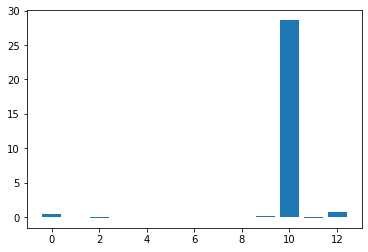

In [1040]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Plotting the results for LR 


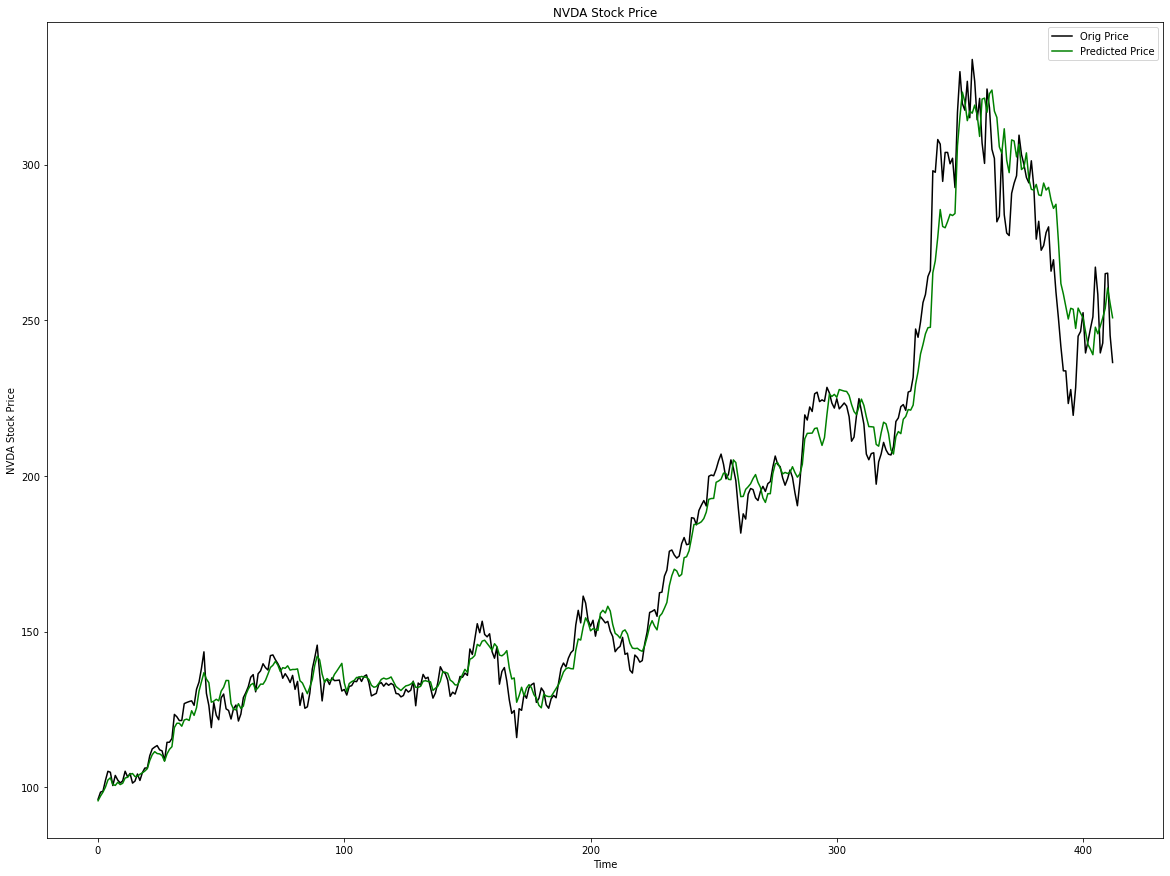

In [1046]:
plt.figure(figsize=(20,15))
plt.plot(original_array,color='black',label='Orig Price')
plt.plot(pred_array,color='green',label='Predicted Price')
plt.title('NVDA Stock Price')
plt.xlabel ('Time')
plt.ylabel ('NVDA Stock Price')
plt.legend()
plt.show()

# 2. Long Short-Term Memory (LSTM)